<a href="https://colab.research.google.com/github/manish211215/recommendor-system/blob/master/RecomSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Recommendor systems

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv("/content/train.csv")

In [3]:
train_data.head()

,user_id,sex,age,occupation,movie title,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp
0,173,M,56,other,Evita (1996),289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988
1,607,F,49,healthcare,Raiders of the Lost Ark (1981),174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516
2,600,M,34,programmer,Natural Born Killers (1994),53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563
3,104,M,27,student,Beverly Hills Ninja (1997),456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853
4,486,M,39,educator,"Frighteners, The (1996)",123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278


In [4]:
train_exp = train_data

In [5]:
train_exp['male'] = pd.get_dummies(train_exp.sex,drop_first=True)

In [6]:
train_exp.drop(['occupation','sex'],axis = 1,inplace=True)

In [7]:
train_exp.drop(['movie title'],inplace = True,axis = 1)

In [8]:
train_exp

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,683,42,301,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,893283728,1
79996,191,33,750,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,891560253,1
79997,625,27,169,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,891263665,1
79998,128,24,402,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,879969136,0


In [9]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [10]:
ratings = pd.DataFrame(train_exp.groupby('movie_id')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(train_exp.groupby('movie_id')['rating'].count())

In [11]:
ratings.head()

,rating,num of ratings
movie_id,,
1,3.908012,337
2,3.257143,105
3,3.069444,72
4,3.593939,165
5,3.310811,74


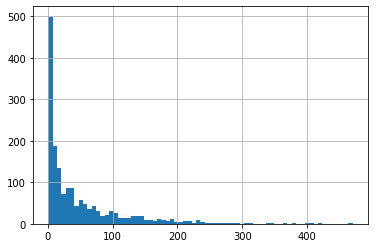

In [12]:
ratings['num of ratings'].hist(bins=70)

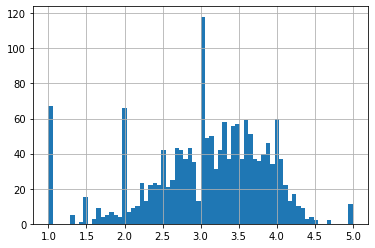

In [13]:
ratings['rating'].hist(bins=70)

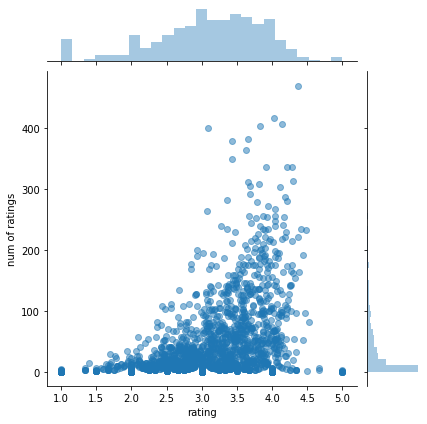

In [14]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha=0.5)

In [15]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [16]:
df = train_exp[['user_id','movie_id','rating','unix_timestamp']]

In [17]:
df.head()

,user_id,movie_id,rating,unix_timestamp
0,173,289,4,877556988
1,607,174,3,883879516
2,600,53,4,888452563
3,104,456,3,888465853
4,486,123,3,879875278


In [18]:
moviemat = df.pivot_table(index='user_id',columns='movie_id',values='rating')

In [19]:
moviemat

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1631,1632,1633,1636,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1651,1652,1653,1654,1655,1656,1658,1659,1660,1661,1662,1663,1664,1665,1668,1669,1670,1671,1672,1674,1677,1678,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,5.0,NaN,5.0,NaN,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,1.0,3.0,NaN,5.0,4.0,2.0,1.0,2.0,2.0,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# moviemat.columns[0]
# moviemat.drop(moviemat.columns[2],axis=1)

In [22]:
final_list= []
while moviemat.shape[1]>0:
    movie_1_user_rating = moviemat.iloc[:,0]
    similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
    corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
    corr_movie1.dropna(inplace = True)
    corr_movie1 = corr_movie1.join(ratings['num of ratings'])
    g  = corr_movie1[corr_movie1['num of ratings']>100 ].sort_values('Correlation',ascending=False).head(5)
    if (g.shape[0]>0):
      s = tuple(g.index)
      final_list.append(s)
      for i in list(s):
        if (i in moviemat.columns):
            moviemat.drop(i,inplace=True,axis=1)
        
    else:
      moviemat.drop(moviemat.columns[0],inplace=True,axis=1)
    print(moviemat.shape)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


(943, 1644)
(943, 1639)
(943, 1634)
(943, 1629)
(943, 1624)
(943, 1619)
(943, 1614)
(943, 1609)
(943, 1604)
(943, 1599)
(943, 1594)
(943, 1589)
(943, 1584)
(943, 1579)
(943, 1574)
(943, 1569)
(943, 1564)
(943, 1559)
(943, 1554)
(943, 1549)
(943, 1544)
(943, 1539)
(943, 1534)
(943, 1529)
(943, 1524)
(943, 1519)
(943, 1514)
(943, 1509)
(943, 1504)
(943, 1499)
(943, 1494)
(943, 1489)
(943, 1484)
(943, 1479)
(943, 1474)
(943, 1469)
(943, 1464)
(943, 1459)
(943, 1454)
(943, 1449)
(943, 1444)
(943, 1439)
(943, 1434)
(943, 1429)
(943, 1424)
(943, 1419)
(943, 1414)
(943, 1409)
(943, 1404)
(943, 1399)
(943, 1394)
(943, 1393)
(943, 1392)
(943, 1391)
(943, 1390)
(943, 1389)
(943, 1388)
(943, 1387)
(943, 1386)
(943, 1385)
(943, 1384)
(943, 1383)
(943, 1382)
(943, 1381)
(943, 1380)
(943, 1379)
(943, 1378)
(943, 1377)
(943, 1376)
(943, 1375)
(943, 1374)
(943, 1373)
(943, 1372)
(943, 1371)
(943, 1370)
(943, 1369)
(943, 1368)
(943, 1367)
(943, 1366)
(943, 1365)
(943, 1364)
(943, 1363)
(943, 1362)
(943

In [23]:
print(final_list)

[(1, 692, 501, 161, 845), (2, 304, 303, 411, 750), (321, 690, 322, 735, 332), (326, 176, 514, 527, 24), (739, 474, 239, 748, 628), (137, 751, 763, 193, 358), (333, 177, 196, 410, 195), (150, 217, 22, 655, 325), (282, 55, 559, 87, 249), (310, 227, 96, 252, 228), (132, 14, 343, 66, 746), (231, 230, 315, 135, 403), (202, 443, 475, 79, 482), (111, 597, 307, 298, 13), (82, 271, 285, 566, 472), (238, 88, 154, 435, 402), (72, 125, 511, 56, 550), (357, 121, 208, 1028, 77), (319, 1047, 7, 240, 268), (168, 265, 293, 134, 276), (286, 631, 294, 185, 197), (156, 385, 127, 229, 1016), (237, 94, 117, 218, 175), (191, 28, 15, 289, 213), (200, 582, 405, 433, 183), (118, 255, 58, 173, 451), (288, 42, 95, 684, 147), (215, 9, 283, 174, 508), (68, 226, 257, 188, 11), (97, 546, 148, 98, 182), (194, 64, 473, 243, 211), (476, 216, 203, 151, 89), (483, 250, 455, 258, 568), (50, 462, 12, 235, 209), (300, 31, 427, 328, 432), (327, 313, 47, 523, 109), (86, 25, 393, 181, 190), (484, 223, 273, 99, 179), (124, 180, 

In [130]:
# recommender(moviemat,ratings)

In [69]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [70]:
x = train_exp.groupby(['user_id','movie_id',],as_index=False)['rating'].mean()

In [71]:
x.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [72]:
x.shape

(80000, 3)

In [73]:
# def string_make(m):
#   n=""
#   for i in m:
#     n = n+','+str(i)
#   return n

In [87]:
a = [2,3,5]
t = a.copy()
b = a.copy()
b.remove(3)
print(b)
print(a)

[2, 5]
[2, 3, 5]


In [88]:
#
dict_recommended ={'recommend_list':[],'movie_id':[]}
for i in final_list:
  g = sorted(i)
  for k in g:
    dict_recommended['movie_id'].append(k)
    a = g.copy()
    a.remove(k)
    dict_recommended['recommend_list'].append(a)

In [89]:
len(dict_recommended['recommend_list'])

256

In [90]:
dict_recommended

{'movie_id': [1,
  161,
  501,
  692,
  845,
  2,
  303,
  304,
  411,
  750,
  321,
  322,
  332,
  690,
  735,
  24,
  176,
  326,
  514,
  527,
  239,
  474,
  628,
  739,
  748,
  137,
  193,
  358,
  751,
  763,
  177,
  195,
  196,
  333,
  410,
  22,
  150,
  217,
  325,
  655,
  55,
  87,
  249,
  282,
  559,
  96,
  227,
  228,
  252,
  310,
  14,
  66,
  132,
  343,
  746,
  135,
  230,
  231,
  315,
  403,
  79,
  202,
  443,
  475,
  482,
  13,
  111,
  298,
  307,
  597,
  82,
  271,
  285,
  472,
  566,
  88,
  154,
  238,
  402,
  435,
  56,
  72,
  125,
  511,
  550,
  77,
  121,
  208,
  357,
  1028,
  7,
  240,
  268,
  319,
  1047,
  134,
  168,
  265,
  276,
  293,
  185,
  197,
  286,
  294,
  631,
  127,
  156,
  229,
  385,
  1016,
  94,
  117,
  175,
  218,
  237,
  15,
  28,
  191,
  213,
  289,
  183,
  200,
  405,
  433,
  582,
  58,
  118,
  173,
  255,
  451,
  42,
  95,
  147,
  288,
  684,
  9,
  174,
  215,
  283,
  508,
  11,
  68,
  188,
  226,
  257,


In [92]:
data_recom = pd.DataFrame(dict_recommended)

In [93]:
data_recom.head()

,recommend_list,movie_id
0,"[161, 501, 692, 845]",1
1,"[1, 501, 692, 845]",161
2,"[1, 161, 692, 845]",501
3,"[1, 161, 501, 845]",692
4,"[1, 161, 501, 692]",845


In [94]:
x

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
79995,943,1067,2
79996,943,1074,4
79997,943,1188,3
79998,943,1228,3


In [102]:
t = x[x['rating']>4]

In [103]:
t

,user_id,movie_id,rating
0,1,1,5
5,1,6,5
8,1,9,5
11,1,12,5
12,1,13,5
...,...,...,...
79961,943,485,5
79962,943,508,5
79972,943,614,5
79976,943,721,5


In [104]:
t.shape

(16859, 3)

In [105]:
final_list

[(1, 692, 501, 161, 845),
 (2, 304, 303, 411, 750),
 (321, 690, 322, 735, 332),
 (326, 176, 514, 527, 24),
 (739, 474, 239, 748, 628),
 (137, 751, 763, 193, 358),
 (333, 177, 196, 410, 195),
 (150, 217, 22, 655, 325),
 (282, 55, 559, 87, 249),
 (310, 227, 96, 252, 228),
 (132, 14, 343, 66, 746),
 (231, 230, 315, 135, 403),
 (202, 443, 475, 79, 482),
 (111, 597, 307, 298, 13),
 (82, 271, 285, 566, 472),
 (238, 88, 154, 435, 402),
 (72, 125, 511, 56, 550),
 (357, 121, 208, 1028, 77),
 (319, 1047, 7, 240, 268),
 (168, 265, 293, 134, 276),
 (286, 631, 294, 185, 197),
 (156, 385, 127, 229, 1016),
 (237, 94, 117, 218, 175),
 (191, 28, 15, 289, 213),
 (200, 582, 405, 433, 183),
 (118, 255, 58, 173, 451),
 (288, 42, 95, 684, 147),
 (215, 9, 283, 174, 508),
 (68, 226, 257, 188, 11),
 (97, 546, 148, 98, 182),
 (194, 64, 473, 243, 211),
 (476, 216, 203, 151, 89),
 (483, 250, 455, 258, 568),
 (50, 462, 12, 235, 209),
 (300, 31, 427, 328, 432),
 (327, 313, 47, 523, 109),
 (86, 25, 393, 181, 190),
 

In [106]:
len(final_list)

52

In [161]:
y =pd.merge(t, data_recom, how ='inner', on ='movie_id') 

In [162]:
y

,user_id,movie_id,rating,recommend_list
0,1,1,5,"[161, 501, 692, 845]"
1,16,1,5,"[161, 501, 692, 845]"
2,18,1,5,"[161, 501, 692, 845]"
3,23,1,5,"[161, 501, 692, 845]"
4,25,1,5,"[161, 501, 692, 845]"
...,...,...,...,...
11372,475,259,5,"[143, 248, 367, 705]"
11373,589,259,5,"[143, 248, 367, 705]"
11374,642,259,5,"[143, 248, 367, 705]"
11375,688,259,5,"[143, 248, 367, 705]"


In [163]:
z = y.groupby('user_id',as_index=False)['recommend_list'].sum()

AttributeError: ignored

In [110]:
z

user_id
1      [161, 501, 692, 845, 174, 215, 283, 508, 50, 2...
2      [12, 209, 235, 462, 187, 199, 281, 431, 156, 2...
3      [322, 332, 690, 735, 31, 300, 427, 432, 70, 21...
4      [12, 209, 235, 462, 250, 455, 483, 568, 69, 14...
5      [95, 147, 288, 684, 151, 203, 216, 476, 187, 1...
                             ...                        
939    [28, 191, 213, 289, 156, 229, 385, 1016, 82, 2...
940    [227, 228, 252, 310, 250, 455, 483, 568, 47, 1...
941    [161, 501, 692, 845, 180, 302, 419, 742, 94, 1...
942    [12, 209, 235, 462, 269, 284, 347, 515, 9, 215...
943    [50, 209, 235, 462, 95, 147, 288, 684, 87, 249...
Name: recommend_list, Length: 907, dtype: object

In [157]:
len(z)

907

In [144]:
z.values[0]

[161,
 501,
 692,
 845,
 174,
 215,
 283,
 508,
 50,
 209,
 235,
 462,
 111,
 298,
 307,
 597,
 28,
 191,
 213,
 289,
 95,
 147,
 288,
 684,
 12,
 209,
 235,
 462,
 87,
 249,
 282,
 559,
 194,
 211,
 243,
 473,
 271,
 285,
 472,
 566,
 25,
 181,
 190,
 393,
 55,
 249,
 282,
 559,
 151,
 203,
 216,
 476,
 233,
 245,
 275,
 660,
 227,
 228,
 252,
 310,
 187,
 199,
 281,
 431,
 47,
 313,
 327,
 523,
 13,
 298,
 307,
 597,
 180,
 302,
 419,
 742,
 156,
 229,
 385,
 1016,
 193,
 358,
 751,
 763,
 22,
 217,
 325,
 655,
 269,
 284,
 347,
 515,
 58,
 118,
 255,
 451,
 9,
 215,
 283,
 508,
 94,
 117,
 218,
 237,
 24,
 326,
 514,
 527,
 195,
 196,
 333,
 410,
 25,
 86,
 190,
 393,
 200,
 405,
 433,
 582,
 25,
 86,
 181,
 393,
 15,
 28,
 213,
 289,
 185,
 286,
 294,
 631,
 79,
 443,
 475,
 482,
 77,
 121,
 357,
 1028,
 89,
 151,
 203,
 476,
 99,
 179,
 273,
 484,
 96,
 227,
 252,
 310,
 12,
 50,
 209,
 462,
 250,
 455,
 483,
 568,
 7,
 240,
 319,
 1047,
 172,
 284,
 347,
 515]

In [117]:
li = [2,5,6,8,9]
random(li)

NameError: ignored

In [119]:
import random

In [136]:
set([random.choice(li) for i in range(0,10)])

{2, 5, 6, 8, 9}

In [145]:
list_fanal = []
for i in z.values:
  x = set(i)
  x = list(x)
  boo = [random.choice(x) for i in range(0,10)]
  list_fanal.append(boo)

In [152]:

def strmk(j):
  x=""
  for i in j:
     x = x+','+str(i)
  return x
  

In [153]:
list_fanal[0]

[50, 161, 281, 179, 203, 326, 307, 96, 25, 597]

In [154]:
strmk(list_fanal[0])

',50,161,281,179,203,326,307,96,25,597'

In [156]:
for i in range(0,943):
  print(i+1,strmk(list_fanal[i]) )

1 ,50,161,281,179,203,326,307,96,25,597
2 ,82,91,566,566,245,742,47,281,431,82
3 ,663,432,651,663,735,322,172,663,210,663
4 ,47,313,235,209,235,222,235,462,304,483
5 ,582,47,8,95,8,188,327,582,476,183
6 ,194,197,286,56,527,313,527,419,748,258
7 ,144,109,87,294,431,211,99,179,566,508
8 ,385,301,96,333,125,148,333,462,340,156
9 ,185,185,209,197,568,631,235,235,250,12
10 ,274,217,185,272,455,431,1028,208,294,88
11 ,294,121,1028,174,250,121,250,678,498,208
12 ,234,343,746,191,98,205,28,8,95,89
13 ,651,482,654,15,385,9,482,9,333,514
14 ,89,50,153,319,347,663,50,211,15,50
15 ,451,25,190,56,393,550,190,173,393,190
16 ,654,222,164,318,310,315,99,484,228,183
17 ,22,217,217,655,217,325,655,325,217,655
18 ,79,274,326,343,663,293,191,194,15,15
19 ,88,238,756,238,756,154,88,238,154,154
20 ,55,559,150,249,182,282,217,249,655,655
21 ,527,148,603,508,498,187,199,527,176,498
22 ,514,678,79,1016,511,423,216,72,588,402
23 ,845,742,568,483,347,161,31,272,405,845
24 ,124,208,28,294,326,88,226,274,273,510
2

IndexError: ignored